In [10]:
import sys
import itertools
import os
import psutil
import time
import math

In [11]:
NO_PATH = sys.maxsize
graph = [
    [0,       7,       NO_PATH, 8       ],
    [NO_PATH, 0,       5,       NO_PATH ],
    [NO_PATH, NO_PATH, 0,       2       ],
    [NO_PATH, NO_PATH, NO_PATH, 0       ]
]
MAX_LENGTH = len(graph[0])

In [12]:
sample_e = [[0, 8, NO_PATH, NO_PATH, 5, 3, NO_PATH, NO_PATH, 5, 2, 8, 11, 23, 17, 1, 2],
            [NO_PATH, 0, NO_PATH, 11, 5, NO_PATH, 9, NO_PATH, NO_PATH, 4, NO_PATH, 1, 4, 11, NO_PATH, 8],
            [7, 4, 0, NO_PATH, NO_PATH, 4, NO_PATH, NO_PATH, 5, 3, NO_PATH, NO_PATH, 5, 2, 8, 11],
            [4, 4, 8, 0, 1, NO_PATH, NO_PATH, 2, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 3],
            [4, 4, 8, NO_PATH, 0, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 4, NO_PATH, 11, 5, NO_PATH, 9, NO_PATH],
            [4, 4, 8, NO_PATH, NO_PATH, 0, NO_PATH, NO_PATH, 7, 4, 9, NO_PATH, NO_PATH, 4, NO_PATH, NO_PATH],
            [4, 4, 8, 3, NO_PATH, 2, 0, 12, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 12],
            [4, 4, 8, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0, 5, 2, 9, 22, 3, 7, 9, 1],
            [2, 8, 8, NO_PATH, 5, 3, NO_PATH, NO_PATH, 0, 2, 8, 11, 23, 17, 1, 2],
            [NO_PATH, 5, NO_PATH, 11, 5, NO_PATH, 9, NO_PATH, NO_PATH, 0, NO_PATH, 1, 4, 11, NO_PATH, 8],
            [7, 4, 2, NO_PATH, NO_PATH, 4, NO_PATH, NO_PATH, 5, 3, 0, NO_PATH, 5, 2, 8, 11],
            [NO_PATH, 7, 4, NO_PATH, 1, 2, 9, 2, NO_PATH, NO_PATH, NO_PATH, 0, NO_PATH, NO_PATH, NO_PATH, 3],
            [NO_PATH, 7, 4, 11, 2, NO_PATH, NO_PATH, 3, 5, 4, NO_PATH, 11, 0, NO_PATH, 9, NO_PATH],
            [NO_PATH, 7, 4, NO_PATH, NO_PATH, 9, NO_PATH, NO_PATH, 7, 4, 9, NO_PATH, NO_PATH, 0, NO_PATH, NO_PATH],
            [NO_PATH, 7, 4, 3, NO_PATH, NO_PATH, 8, 12, NO_PATH, 6, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 0, 12],
            [NO_PATH, 7, 4, NO_PATH, NO_PATH, NO_PATH, NO_PATH, 1, 5, 2, NO_PATH, 22, 3, 7, 9, 0]]


## Imperative Way

In [13]:
def floyd(distance):
    for intermediate, start_node, end_node in itertools.product(range(MAX_LENGTH), range(MAX_LENGTH), range(MAX_LENGTH)):
        if start_node == end_node:
            distance[start_node][end_node] == 0
            continue

        distance[start_node][end_node] = min(distance[start_node][end_node], distance[start_node][intermediate] + distance[intermediate][end_node])

    return distance


In [14]:
imperative_results = []

In [15]:
for i in range(100):
    timerStart = time.perf_counter()
    floyd(sample_e)
    timeEnd = time.perf_counter()
    imperative_results.append(
        math.floor((timeEnd - timerStart) * 1000) / 100
    )

## Recursion Way

In [16]:
def shortest_path(start, end, intermediate, distance):

    # base case
    if intermediate < 0:
        return distance[start][end]
    
    return min(
        shortest_path(start, end, intermediate - 1, distance),
        shortest_path(start, intermediate , intermediate - 1, distance) + shortest_path(intermediate, end, intermediate - 1, distance)
    )
    
def floyd(distance):

    for start_node , end_node in itertools.product(range(MAX_LENGTH), range(MAX_LENGTH)):
        
        if start_node == end_node:
            distance[start_node][end_node] = 0
            continue

        distance[start_node][end_node] = shortest_path(start_node, end_node, MAX_LENGTH - 1 , distance)

    return distance

In [17]:
recursion_results = []

In [18]:
for i in range(100):
    timerStart = time.perf_counter()
    floyd(sample_e)
    timeEnd = time.perf_counter()
    recursion_results.append(
        math.floor((timeEnd - timerStart) * 1000) / 100
    )

# Generate Plots

In [19]:
import matplotlib.pyplot as plt

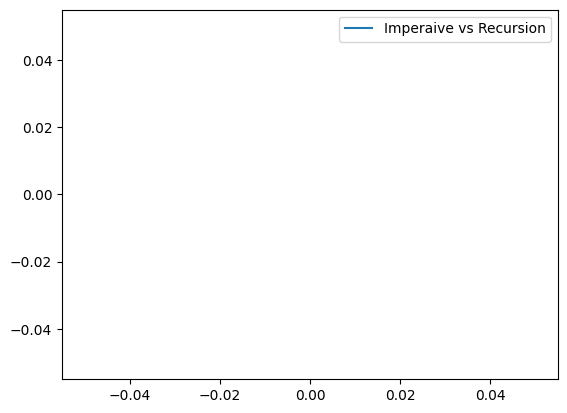

In [21]:
plt.plot(imperative_results, recursion_results, label ='Imperaive vs Recursion')

plt.legend()